In [1]:
//************************************************************************//
//                                                                        //
//  Copyright 2017 Bertram Kopf (bertram@ep1.rub.de)                      //
//                 - Ruhr-Universität Bochum                              //
//                                                                        //
//  This file is part of Pawian.                                          //
//                                                                        //
//  Pawian is free software: you can redistribute it and/or modify        //
//  it under the terms of the GNU General Public License as published by  //
//  the Free Software Foundation, either version 3 of the License, or     //
//  (at your option) any later version.                                   //
//                                                                        //
//  Pawian is distributed in the hope that it will be useful,             //
//  but WITHOUT ANY WARRANTY; without even the implied warranty of        //
//  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the         //
//  GNU General Public License for more details.                          //
//                                                                        //
//  You should have received a copy of the GNU General Public License     //
//  along with Pawian.  If not, see <http://www.gnu.org/licenses/>.       //
//                                                                        //
//************************************************************************//

#include <iostream>
#include <sstream>
#include "TFile.h"
#include "TH1F.h"
#include "TCanvas.h"
#include "TMath.h"
#include "TLegend.h"
#include <algorithm>    // std::max

TCanvas* contribCanvas = new TCanvas();

In [2]:
void DrawContibutions(std::string rootFileNames, std::string name, bool withLegend = false, 
                          std::string legendNames = "") {
  TH1F* histVec[20];
  
  std::stringstream rootFileNamesStrStr(rootFileNames);
  vector<std::string> rootFileNamesVec;
  std::string currentStr;
  while (rootFileNamesStrStr >> currentStr) rootFileNamesVec.push_back(currentStr);
  vector<std::string>::iterator it;
  for(it = rootFileNamesVec.begin(); it != rootFileNamesVec.end(); ++it) {
    std::cout << (*it) << std::endl;
  }

  TLegend *legend = new TLegend(0.19, 0.59, 0.39, 0.89);
  vector<std::string> legendNamesVec;
  if (withLegend) {
    std::stringstream legendNamesStrStr(legendNames);
    while (legendNamesStrStr >> currentStr) legendNamesVec.push_back(currentStr);
    for (it = legendNamesVec.begin(); it != legendNamesVec.end(); ++it){
      std::cout << (*it) << std::endl;
    }
    if (rootFileNamesVec.size() != legendNamesVec.size()) {
      std::cout << "rootFileNamesVec.size()= " << rootFileNamesVec.size() 
          << " != legendNamesVec.size(): " << legendNamesVec.size() << std::endl;
      return;
    }
  }
 
  for (unsigned int id = 0; id < rootFileNamesVec.size(); ++id){
    std::string currentFileName = rootFileNamesVec.at(id);
    TFile* currentTFile = new TFile(currentFileName.c_str());
    TH1F* currentHist = (TH1F*)currentTFile->Get(name.c_str());
    currentHist->SetLineColor(kBlack + id);
    currentHist->SetLineWidth(2);
    histVec[id] = currentHist;
    if (0 ==id) 
        currentHist->Draw(); 
    else 
        currentHist->Draw("same");
    currentHist->SetMaximum(1.05*(std::max(currentHist->GetMaximum(), histVec[0]->GetMaximum())));
    if (withLegend) 
        legend->AddEntry(currentHist, legendNamesVec.at(id).c_str(), "l");
  }

  if (withLegend) {
    legend->SetFillColor(0);
    legend->SetBorderSize(1);
    legend->Draw(); 
  } 
}

/nfs/data/jollyj/bertram/fits/pbarp/coupled_PiPiEta_PiEtaEta_KKPi/paperFinalHyper/final/Ochs2013---/4f2_0orderBgV5a/qaPiPiEta
pawianHists.root
pawianHistsf0Matrix.root
pawianHistsf2Matrix.root
pawianHistsa0Matrix.root
pawianHistsa2Matrix.root
pawianHistspi1Matrix.root
all
f0
f2
a0
a2
#pi_{1}


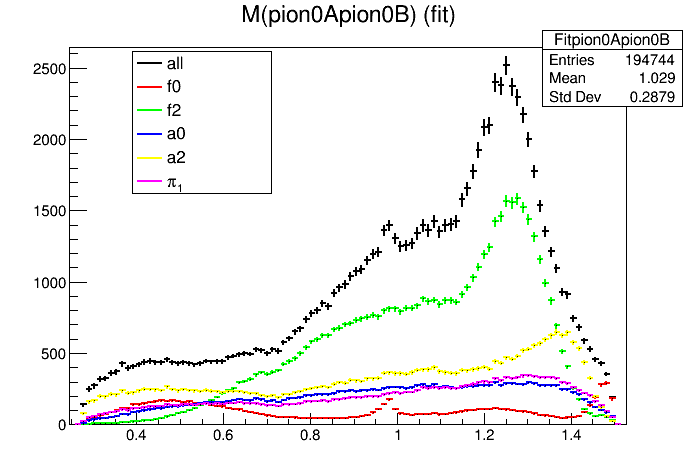

In [3]:
gSystem->cd("/data/jollyj/bertram/fits/pbarp/coupled_PiPiEta_PiEtaEta_KKPi/paperFinalHyper/final/Ochs2013---/4f2_0orderBgV5a/qaPiPiEta");
std::cout << gSystem->pwd() << std::endl;
DrawContibutions("pawianHists.root pawianHistsf0Matrix.root pawianHistsf2Matrix.root pawianHistsa0Matrix.root pawianHistsa2Matrix.root pawianHistspi1Matrix.root","Fitpion0Apion0B", true, "all f0 f2 a0 a2 #pi_{1}");

contribCanvas->Draw();

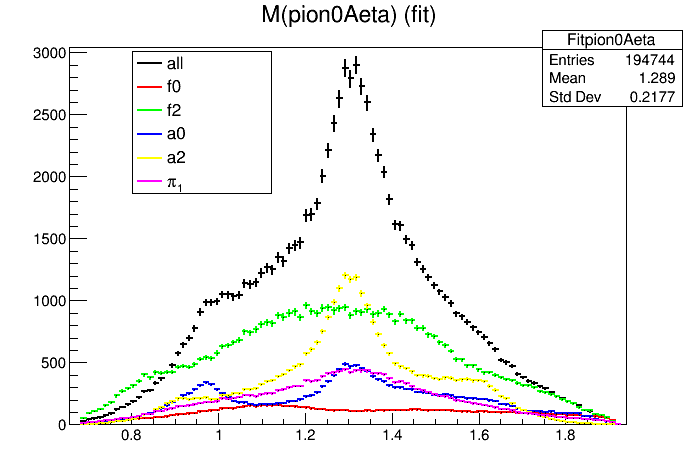

pawianHists.root
pawianHistsf0Matrix.root
pawianHistsf2Matrix.root
pawianHistsa0Matrix.root
pawianHistsa2Matrix.root
pawianHistspi1Matrix.root
all
f0
f2
a0
a2
#pi_{1}


In [4]:
DrawContibutions("pawianHists.root pawianHistsf0Matrix.root pawianHistsf2Matrix.root pawianHistsa0Matrix.root pawianHistsa2Matrix.root pawianHistspi1Matrix.root","Fitpion0Aeta", true, "all f0 f2 a0 a2 #pi_{1}");

contribCanvas->Draw();